In [1]:
import numpy as np
import matplotlib.pyplot as plt

Plotting ground truth values and calculated values

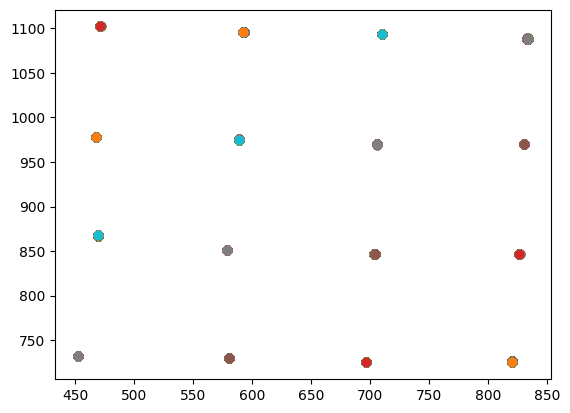

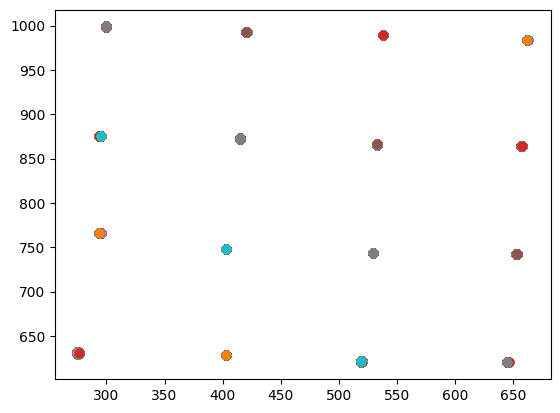

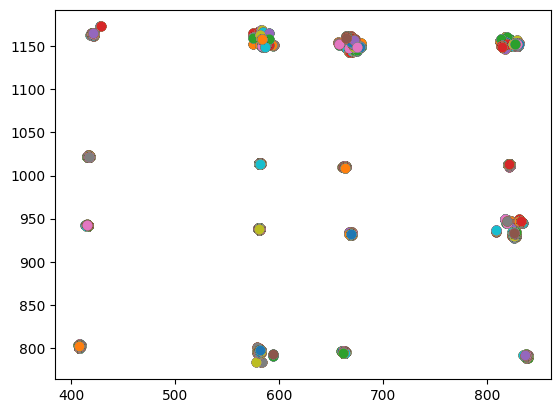

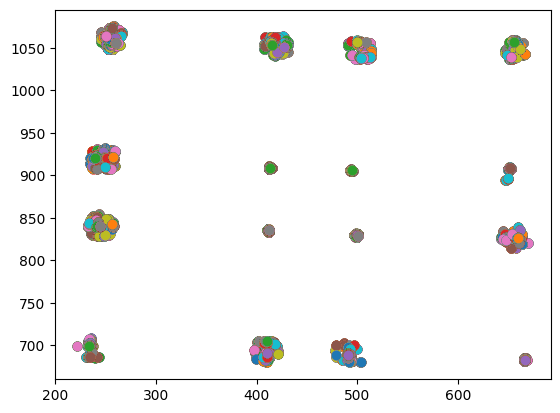

In [2]:
real_red = [(450,732),(579,729),(693,726),(819,726),
            (468,867),(576,852),(702,846),(825,846),
            (465,975),(585,975),(705,969),(828,969),
            (468,1101),(591,1095),(708,1095),(831,1086)]

real_green = [(408,801),(579,792),(660,795),(831,792),
              (414,942),(579,936),(669,936),(825,933),
              (414,1020),(579,1011),(663,1008),(819,1008),
              (420,1161),(582,1155),(666,1152),(819,1149)]

real_right_red = [(299,999),(420,993),(539,990),(662,984),
                  (294,875),(414,873),(531,866),(657,864),
                  (293,765),(402,747),(528,741),(653,740),
                  (278,635),(405,632),(524,627),(647,623)]

real_right_green = [(255,1061),(419,1055),(503,1049),(656,1049),
                    (248,920),(413,909),(494,906),(650,906),
                    (245,840),(411,834),(500,828),(654,828),
                    (239,704),(410,693),(491,690),(666,684)]

def collectvalue(realvalue,filename):
    all_coords = []
    for i in range(len(realvalue)):
        target_x = realvalue[i][0]
        target_y = realvalue[i][1]
        tolerance = 30  # Define the tolerance range

        coords = []
        # Open the file
        with open(filename, 'r') as file:
            # Read each line
            for line in file:
                # Split the line into individual values
                values = line.strip().split()
                # Iterate through the values
                for value in values:
                    # Split the value into x and y components
                    x, y = value.split(',')
                    # Check if the x and y components are within the tolerance range of the target values
                    if abs(int(x) - target_x) <= tolerance and abs(int(y) - target_y) <= tolerance:
                        #print(f"Found values close to {target_x},{target_y}: {x},{y}")
                        coords.append((int(x), int(y)))
        all_coords.append(coords)
    return all_coords


red_left = collectvalue(real_red,"Week22/RedAllLeft.txt")
for j in range(len(red_left)):
    for l in range(len(red_left[j])):
        plt.plot(red_left[j][l][0],red_left[j][l][1],"o")
plt.savefig("Week22/leftredspread.svg",format="svg")
plt.show()
red_right = collectvalue(real_right_red,"Week22/RedAllRight.txt")
for m in range(len(red_right)):
    for n in range(len(red_right[m])):
        plt.plot(red_right[m][n][0],red_right[m][n][1],"o")
plt.savefig("Week22/rightredspread.svg",format="svg")
plt.show()
green_left = collectvalue(real_green,"Week22/GreenAllLeft.txt")
for o in range(len(green_left)):
    for p in range(len(green_left[o])):
        plt.plot(green_left[o][p][0],green_left[o][p][1],"o")
plt.savefig("Week22/leftgreenspread.svg",format="svg")
plt.show()
green_right = collectvalue(real_right_green,"Week22/GreenAllRight.txt")
for q in range(len(green_right)):
    for r in range(len(green_right[q])):
        plt.plot(green_right[q][r][0],green_right[q][r][1],"o")
plt.savefig("Week22/rightgreenspread.svg",format="svg")
plt.show()

Calculate accuracy

In [3]:
def accuracyfind(realvalue,coords,colour,side):
    match_counts =[]
    tolerance = 10
    for i, coord in enumerate(realvalue):
        count = 0
        target_x, target_y = coord
        # Compare with the respective list in comparison_lists
        for comparison_coord in coords[i]:
            comp_x, comp_y = comparison_coord
            if abs(target_x - comp_x) < tolerance and abs(target_y - comp_y) < tolerance:
                count += 1
        # Append the count to match_counts
        match_counts.append(count)

    accuracies = []
    # Calculate accuracy
    for i in range(len(match_counts)):
        acc = match_counts[i]/len(coords[i])
        accuracies.append(acc)
        accuracy = np.average(accuracies)
    print(f"The accuracy of {colour} {side} is",round(accuracy*100,2),"%")
    return accuracy

accrl = accuracyfind(real_red,red_left,"red","left")
accrr = accuracyfind(real_right_red,red_right,"red","right")
accgl = accuracyfind(real_green,green_left,"green","left")
accgr = accuracyfind(real_right_green,green_right,"green","right")

acc = [accrl,accrr,accgr,accgl]

print(np.average(acc))

The accuracy of red left is 100.0 %
The accuracy of red right is 100.0 %
The accuracy of green left is 95.46 %
The accuracy of green right is 79.98 %
0.9385929573373066


**MOTA**

\begin{equation}
    MOTA = 1- \frac{\sum_t{FN_t+FP_t+IDsw_t}}{\sum_t{GT_t}},
\end{equation}

where:

$FN_t$ is the number of false negatives (missed targets) at time $t$.

$FP_t$ is the number of false positives at time $t$.

$IDsw_t$ is the number of identity switches at time $t$.

$GT_t$ is the number of ground truth objects at time $t$.

**MOTP**

\begin{equation}
    MOTP = \frac{\sum_{i,t}{d_{i,t}}}{\sum_t{c_t}}
\end{equation}

where:

$d_{i,t}$ is the distance (usually Euclidean) between the ground truth and the predicted position of object i at time $t$.

$c_t$ is the number of matches found at time $t$.



MOT: Multi-object tracker

TA: Tracking accuracy

TP: Tracking precision

MT: numbers of mostly tracked trajectories I.e. target has the same label for at least 80\% of its life span.

ML: number of mostly lost trajectories. i.e. target is not tracked for at least 20\% of its life span. 

FP: number of false detections. 

FN: number of missed detections.

ID sw: number of times an ID switches to a different previously tracked object.
\end{itemize}

Multi-object tracking accuracy, *MOTA*

In [13]:
#False negatives, postives and index shifts are manually found and summarized below

FP_leftred = 70
Idsw_leftred = 47
FN_leftred = 0

FP_rightred = 50
Idsw_rightred = 43
FN_rightred = 0

FP_leftgreen = 285
FN_leftgreen = 3
Idsw_leftgreen = 104

FP_rightgreen = 1137
FN_rightgreen = 0
Idsw_rightgreen = 156


FPtot = np.average([FP_leftred,FP_rightred,FP_leftgreen,FP_rightgreen])
FNtot = np.average([FN_leftred,FN_rightred,FN_leftgreen,FN_rightgreen])
IDswtot = np.average([Idsw_leftred,Idsw_rightred, Idsw_leftgreen,Idsw_rightgreen])

print("Average amount of: \nFalse positives: ",FPtot," \nFalse negatives: ",FNtot," \nIndex shifts: ",IDswtot)


FPtot = np.sum([FP_leftred,FP_rightred,FP_leftgreen,FP_rightgreen])
FNtot = np.sum([FN_leftred,FN_rightred,FN_leftgreen,FN_rightgreen])
IDswtot = np.sum([Idsw_leftred,Idsw_rightred, Idsw_leftgreen,Idsw_rightgreen])

print("Total amount of: \nFalse positives: ",FPtot," \nFalse negatives: ",FNtot," \nIndex shifts: ",IDswtot)

MOTA = 1- (np.sum(FPtot+FNtot+IDswtot)/(256*213))
print("Total MOTA:",MOTA)

Average amount of: 
False positives:  385.5  
False negatives:  0.75  
Index shifts:  87.5
Total amount of: 
False positives:  1542  
False negatives:  3  
Index shifts:  350
Total MOTA: 0.9652472124413145


Multi-object tracking precision, *MOTP*

In [14]:

def parse_predicted_coordinates(line):
    coords = []
    pairs = line.strip().split()
    for pair in pairs:
        x, y = map(int, pair.split(','))
        coords.append((x, y))
    return coords

def calculate_normalized_motp(filename, ground_truth, max_distance):
    total_distance = 0
    total_matches = 0

    with open(filename, 'r') as file:
        for line in file:
            predicted_coords = parse_predicted_coordinates(line)
            for i, (gt_x, gt_y) in enumerate(ground_truth):
                if i < len(predicted_coords):
                    pred_x, pred_y = predicted_coords[i]
                    distance = np.sqrt((gt_x - pred_x)**2 + (gt_y - pred_y)**2)
                    total_distance += distance / max_distance
                    total_matches += 1

    if total_matches == 0:
        return float('inf')  # If there are no matches, return infinity to indicate undefined MOTP

    motp = total_distance / total_matches
    return motp

max_distance = np.sqrt(1080**2 + 1920**2)  # Adjust according to your coordinate system


# Example usage:
filename1 = 'Week22/RedAllLeft.txt'  # Replace with your filename
filename2 = 'Week22/RedAllRight.txt'
filename3 = 'Week22/GreenAllLeft.txt'
filename4 = 'Week22/GreenAllRight.txt'
motp_lred = calculate_normalized_motp(filename1, real_red,max_distance)
motp_rgreen = calculate_normalized_motp(filename4, real_right_green,max_distance)
motp_rred = calculate_normalized_motp(filename2, real_right_red,max_distance)
motp_lgreen = calculate_normalized_motp(filename3, real_green,max_distance)



print(f"MOTP for red objects: {1-motp_lred}")
print(f"MOTP for green objects: {1-motp_lgreen}")
print(f"MOTP for red objects: {1-motp_rred}")
print(f"MOTP for green objects: {1-motp_rgreen}")

print("Total MOTP: ", 1-np.average([motp_lred,motp_rred,motp_lgreen,motp_rgreen]))

MOTP for red objects: 0.8751516854062812
MOTP for green objects: 0.8666902522006819
MOTP for red objects: 0.9679511329065689
MOTP for green objects: 0.9073478820944225
Total MOTP:  0.9042852381519886


Mostly tracked trajectories, *MT*

In [16]:

# Function to parse predicted coordinates from a line
def parse_predicted_coordinates(line):
    coords = []
    pairs = line.strip().split()
    for pair in pairs:
        x, y = map(int, pair.split(','))
        coords.append((x, y))
    return coords

# Function to track labels consistency for MT calculation
def track_labels_consistency(filename, ground_truth):
    label_tracks = {i: [] for i in range(len(ground_truth))}
    total_frames = 0

    with open(filename, 'r') as file:
        for line in file:
            predicted_coords = parse_predicted_coordinates(line)
            for i, (gt_x, gt_y) in enumerate(ground_truth):
                if i < len(predicted_coords):
                    pred_x, pred_y = predicted_coords[i]
                    distance = np.sqrt((gt_x - pred_x)**2 + (gt_y - pred_y)**2)
                    # Considering a match if the distance is within a tolerance (e.g., 10 pixels)
                    if distance <= 10:
                        label_tracks[i].append(True)
                    else:
                        label_tracks[i].append(False)
            total_frames += 1

    mostly_tracked_count = 0
    for target, labels in label_tracks.items():
        if len(labels) > 0:
            consistent_count = labels.count(True)
            print(consistent_count/len(labels))
            if consistent_count / len(labels) >= 0.79:
                mostly_tracked_count += 1

    return mostly_tracked_count, len(label_tracks)

# Example usage:
filename1 = 'Week22/RedAllLeft.txt'  # Replace with your filename
filename2 = 'Week22/RedAllRight.txt'
filename3 = 'Week22/GreenAllLeft.txt'
filename4 = 'Week22/GreenAllRight.txt'
mt_lred, total_lred = track_labels_consistency(filename1, real_red)
mt_rred, total_rred= track_labels_consistency(filename2, real_right_red)
mt_lgreen, total_lgreen = track_labels_consistency(filename3, real_green)
mt_rgreen, total_rgreen = track_labels_consistency(filename4, real_right_green)


print(f"MT for red left objects: {mt_lred} out of {total_lred}")
print(f"MT for green left objects: {mt_lgreen} out of {total_lgreen}")
print(f"MT for red right objects: {mt_rred} out of {total_rred}")
print(f"MT for green right objects: {mt_rgreen} out of {total_rgreen}")


print("Total MT: ",np.sum([mt_lred,mt_lgreen,mt_rred,mt_rgreen])/np.sum([total_lred,total_rred,total_lgreen,total_rgreen]))


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.7934272300469484
0.7934272300469484
0.7934272300469484
0.7934272300469484
0.7934272300469484
0.7934272300469484
0.13615023474178403
0.29107981220657275
0.7934272300469484
0.7934272300469484
0.0
0.1784037558685446
0.7934272300469484
0.7934272300469484
0.0
0.1784037558685446
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.014084507042253521
0.009389671361502348
0.046948356807511735
0.0
0.0
0.0
0.0
0.0
0.13615023474178403
0.20187793427230047
0.0892018779342723
0.046948356807511735
0.12206572769953052
0.014084507042253521
0.009389671361502348
0.1596244131455399
0.03286384976525822
0.009389671361502348
0.009389671361502348
0.04225352112676056
0.014084507042253521
0.009389671361502348
0.028169014084507043
0.014084507042253521
MT for red left objects: 0 out of 16
MT for green left objects: 0 out of 16
MT for red right objects: 10 out of 16
MT for green right objects: 0 out of 16
Total MT:  0.15625


Mostly lost trajectories, *ML*

In [17]:
# Function to track presence and calculate ML
def track_presence_and_calculate_ml(filename, ground_truth):
    presence_tracks = {i: {'total_frames': 0, 'lost_frames': 0} for i in range(len(ground_truth))}
    total_frames = 0

    with open(filename, 'r') as file:
        for line in file:
            predicted_coords = parse_predicted_coordinates(line)
            for i, (gt_x, gt_y) in enumerate(ground_truth):
                if i < len(predicted_coords):
                    pred_x, pred_y = predicted_coords[i]
                    distance = np.sqrt((gt_x - pred_x)**2 + (gt_y - pred_y)**2)
                    # Considering a match if the distance is within a tolerance (e.g., 10 pixels)
                    if distance <= 10:
                        presence_tracks[i]['total_frames'] += 1
                    else:
                        presence_tracks[i]['lost_frames'] += 1
                    presence_tracks[i]['total_frames'] += 1
            total_frames += 1

    mostly_lost_count = 0
    for target, info in presence_tracks.items():
        if info['total_frames'] > 0:
            if info['lost_frames'] / info['total_frames'] >= 0.2:
                mostly_lost_count += 1

    return mostly_lost_count, len(presence_tracks)

# Example usage:
filename1 = 'Week22/RedAllLeft.txt'  # Replace with your filename
filename2 = 'Week22/RedAllRight.txt'
filename3 = 'Week22/GreenAllLeft.txt'
filename4 = 'Week22/GreenAllRight.txt'
ml_lred, total_lred = track_presence_and_calculate_ml(filename1, real_red)
ml_rred, total_rred= track_presence_and_calculate_ml(filename2, real_right_red)
ml_lgreen, total_lgreen = track_presence_and_calculate_ml(filename3, real_green)
ml_rgreen, total_rgreen = track_presence_and_calculate_ml(filename4, real_right_green)

print(f"ML for red objects: {ml_lred} out of {total_lred}")
print(f"ML for green objects: {ml_lgreen} out of {total_lgreen}")

print(f"ML for red objects: {ml_rred} out of {total_rred}")
print(f"ML for green objects: {ml_rgreen} out of {total_rgreen}")

print("Total ML: ",np.sum([ml_lred,ml_lgreen,ml_rred,ml_rgreen])/np.sum([total_lred,total_rred,total_lgreen,total_rgreen]))


ML for red objects: 16 out of 16
ML for green objects: 16 out of 16
ML for red objects: 6 out of 16
ML for green objects: 16 out of 16
Total ML:  0.84375
